In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Машинное обучение/Лекция_13_Алгоритмы кластеризации/Homework/geo.xlsx')
del data['Unnamed: 0']
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


### Проведем кластеризацию на районы без учета голосов

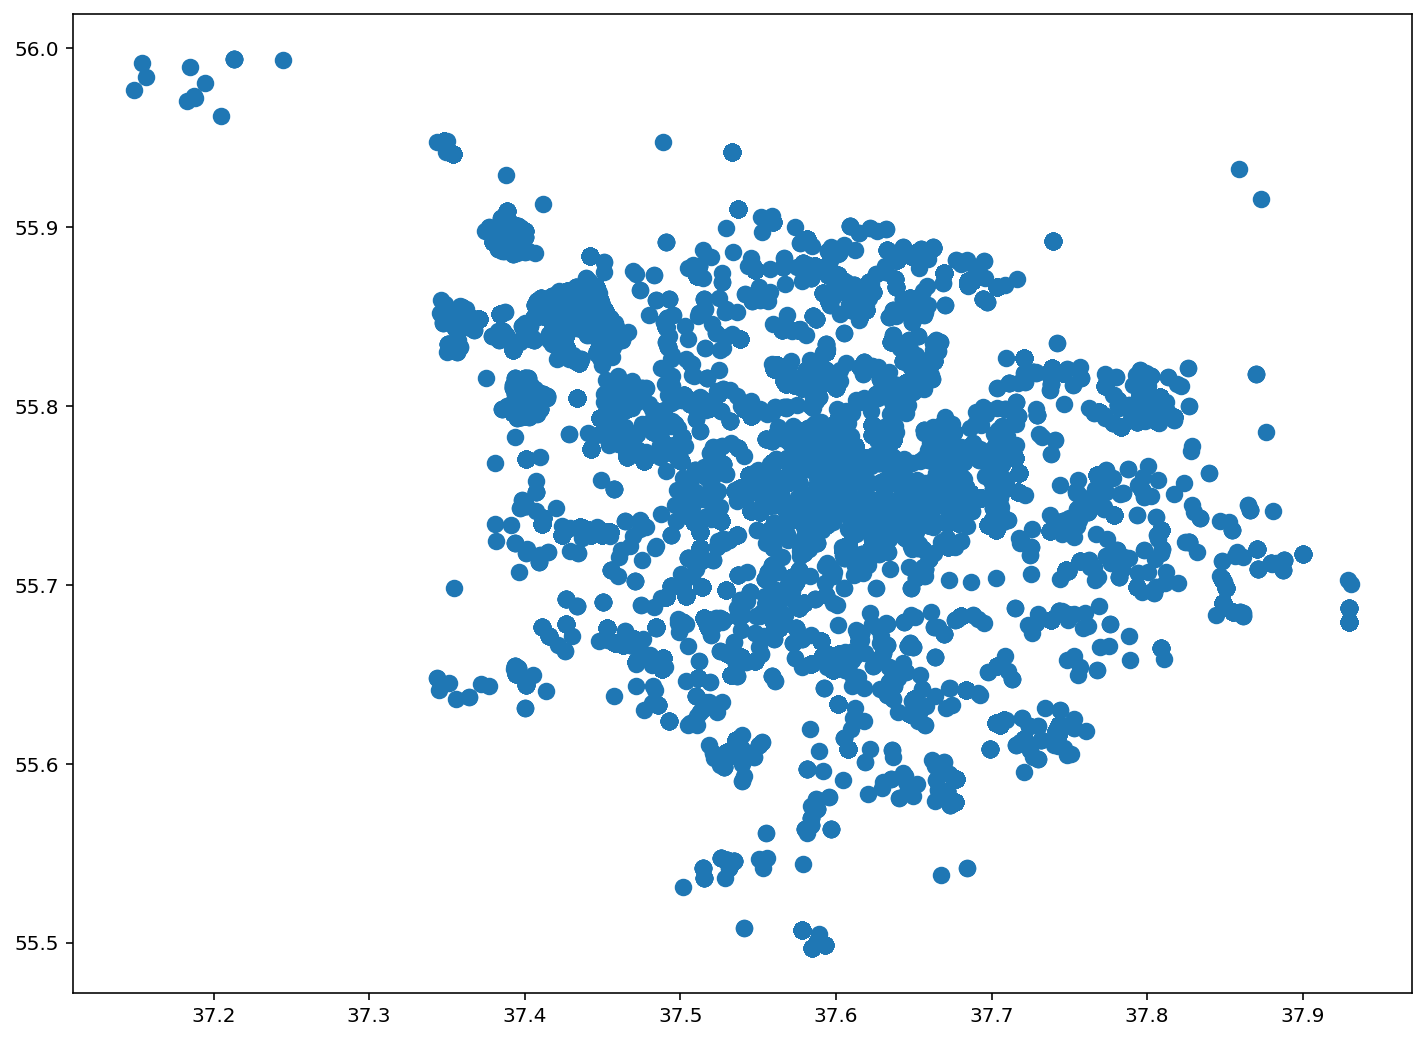

In [4]:
plt.scatter(data['x'], data['y'], s=60)

In [5]:
# приведём данные по обеим осям к нормальному распределению
scaler = StandardScaler()

In [6]:
# выберем данные без учета голоса
X = data[['x', 'y']]

In [7]:
X_scaled = scaler.fit_transform(X)

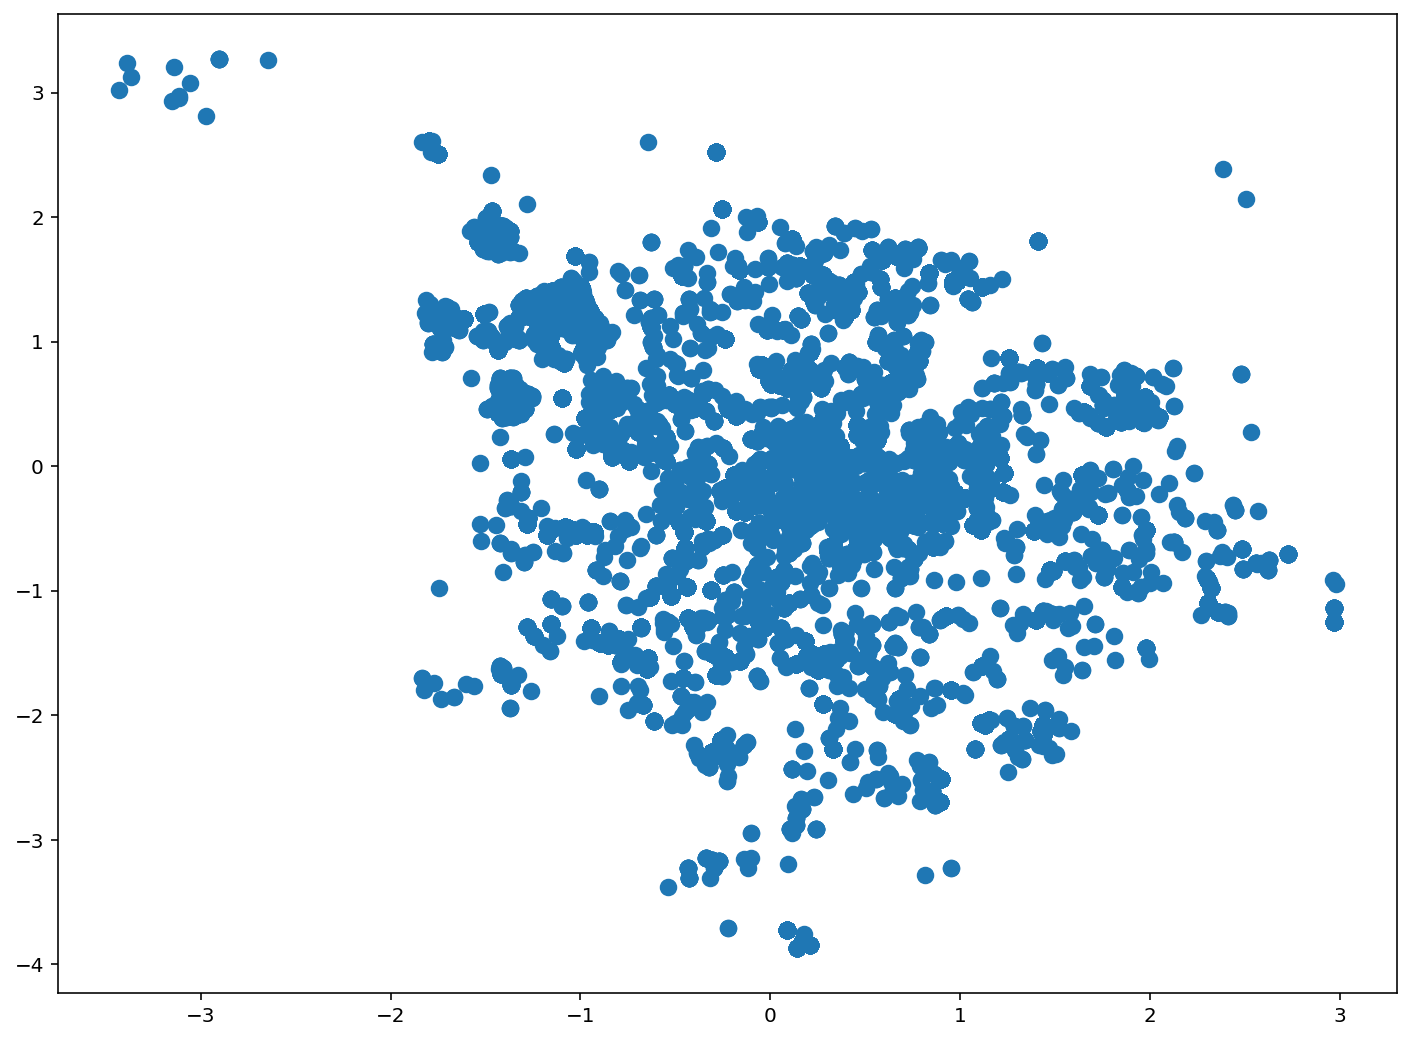

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)

In [9]:
# Считаем только одну метрику тк у нас нет известных кластеров
def get_descr(algo_name, y_pred, X):
    return "{}\nSilhouette {:.2f}".format(
        algo_name,
        silhouette_score(X, y_pred)
    )

Предположим, что оптимально будет разделить на 5 районов

In [10]:
# Разделим на кластеры используя KMeans
clf_kmeans = KMeans(n_clusters=5)

Text(0.5, 1.0, 'KMeans\nSilhouette 0.52')

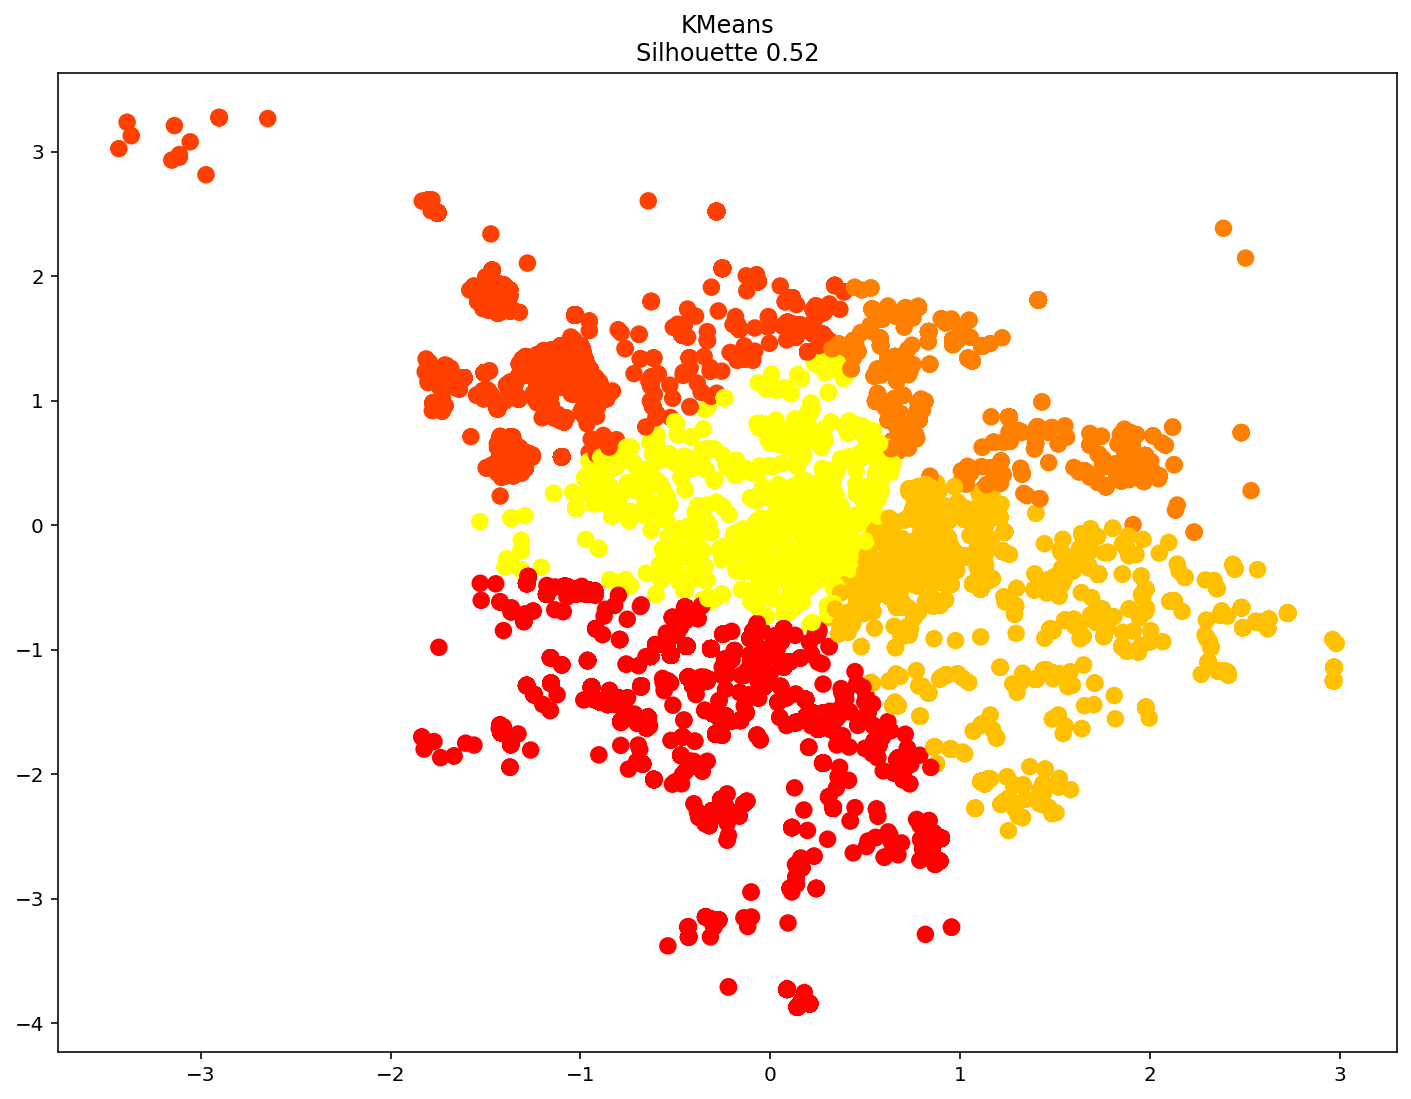

In [22]:
# кластеризуем и выводим картинку
fig, ax = plt.subplots()
clusters = clf_kmeans.fit_predict(X_scaled)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)
ax.set_title(get_descr(clf_kmeans.__class__.__name__, clusters, X_scaled))

### Кластеризация с учетом голосов

In [25]:
# Возьмем данные по районам только, где data['comment_class'] = 1
data_1 = data[data['comment_class'] == 1]

In [30]:
X1_scaled = scaler.fit_transform(data_1[['x', 'y']])

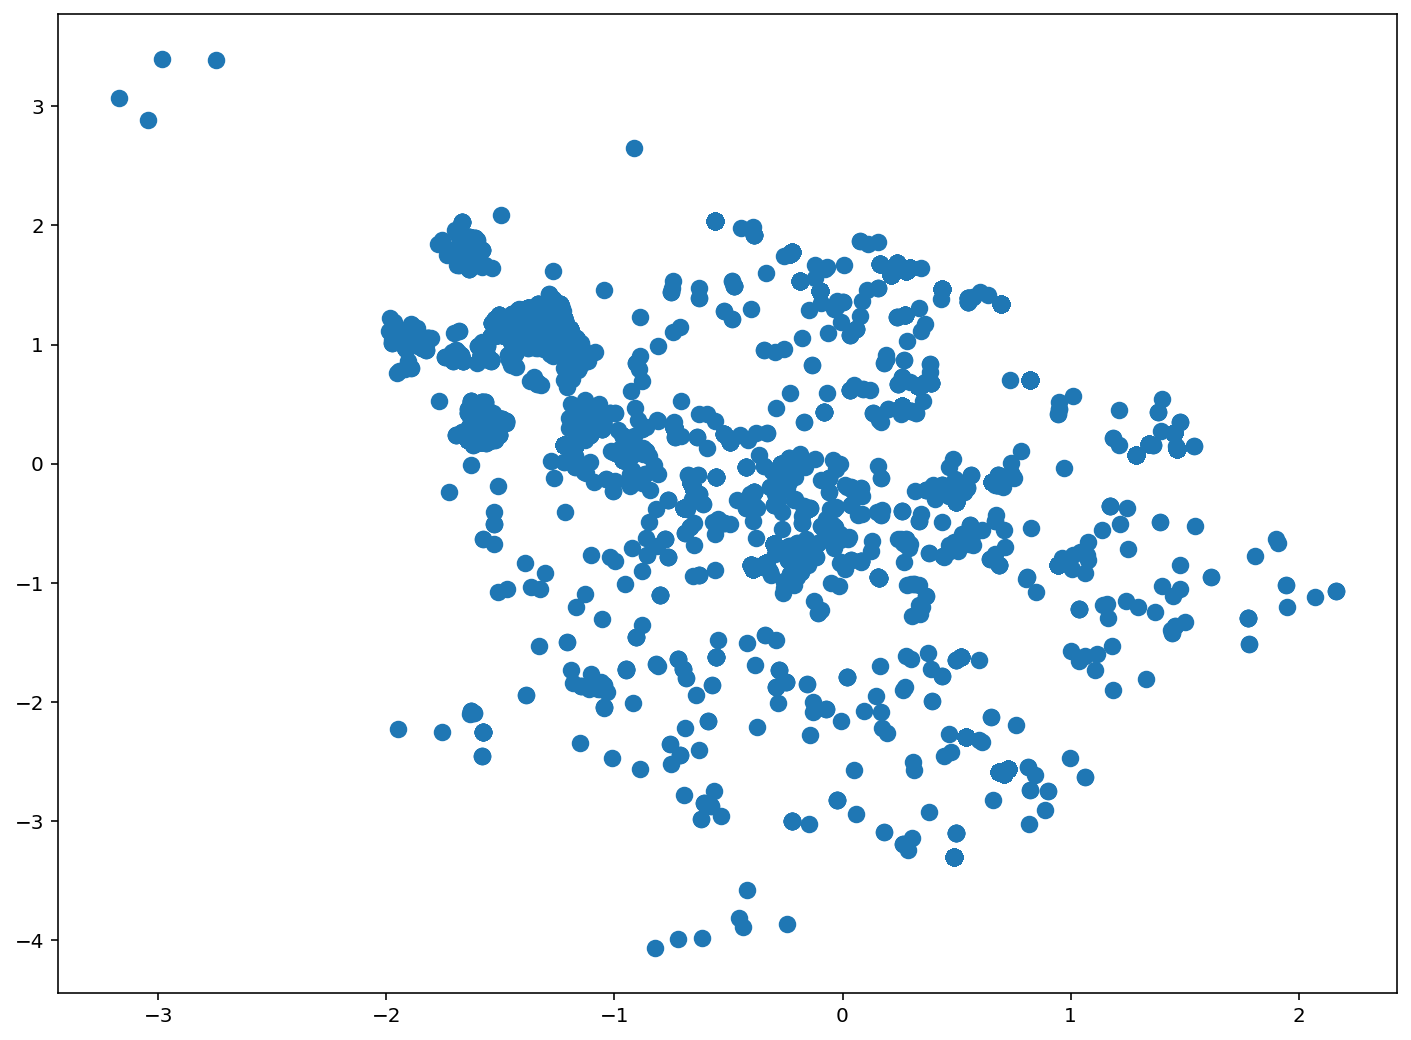

In [31]:
# Выведем данные только для голосов "за"
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], s=60)

Text(0.5, 1.0, 'KMeans\nSilhouette 0.72')

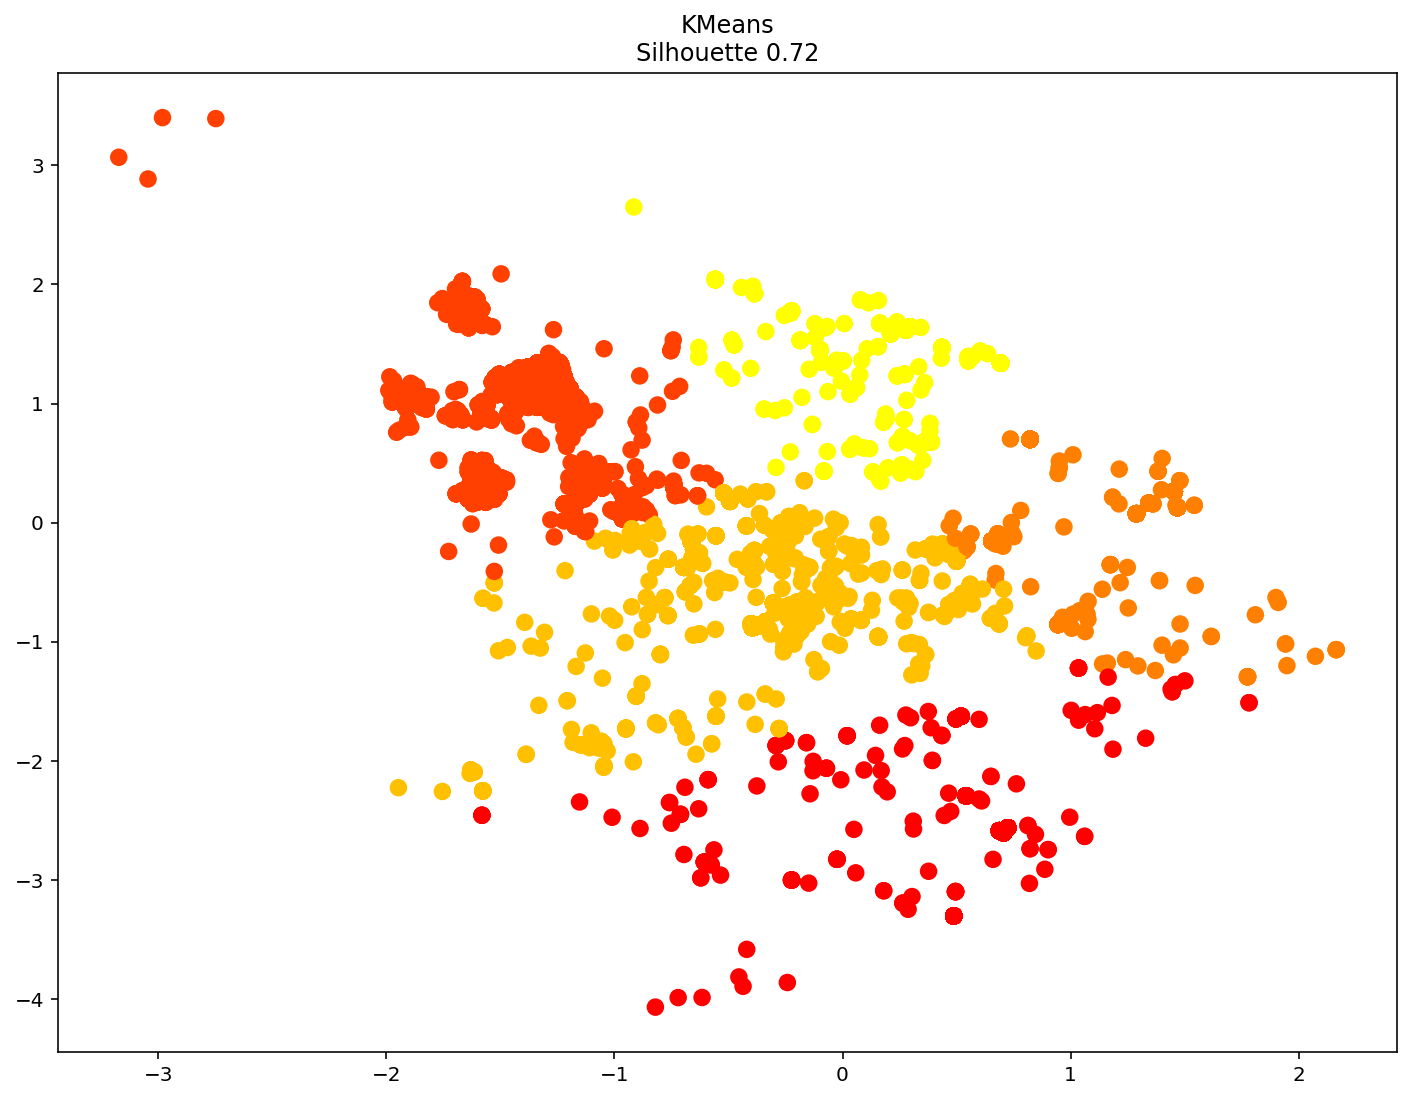

In [35]:
# кластеризуем и выводим картинку
fig, ax = plt.subplots()
clusters1 = clf_kmeans.fit_predict(X1_scaled)
ax.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=clusters1, cmap='autumn', s=60)
ax.set_title(get_descr(clf_kmeans.__class__.__name__, clusters1, X1_scaled))

Видно из графика, что больше всего голосов за в насыщено оранжевом кластере (левый верхний угол), меньше всего в оранжевом (правый кластер)

In [36]:
# Возьмем данные по районам только где data['comment_class'] = 1
data_0 = data[data['comment_class'] == -1]

In [37]:
X0_scaled = scaler.fit_transform(data_0[['x', 'y']])

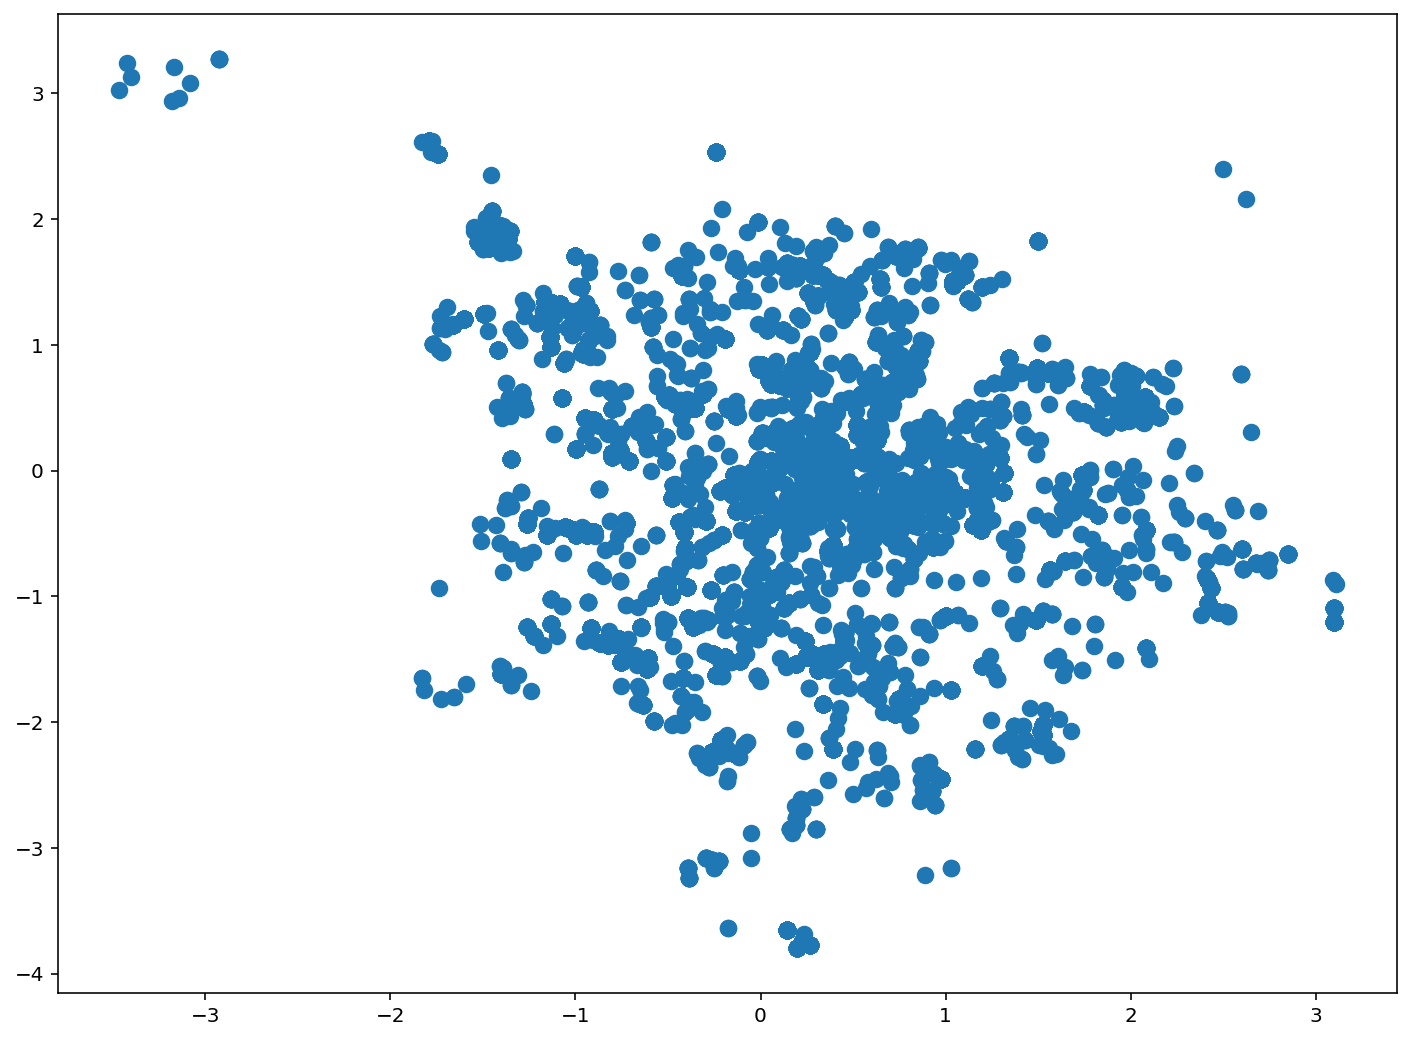

In [38]:
# Выведем данные только для голосов "нет"
plt.scatter(X0_scaled[:, 0], X0_scaled[:, 1], s=60)

Text(0.5, 1.0, 'KMeans\nSilhouette 0.53')

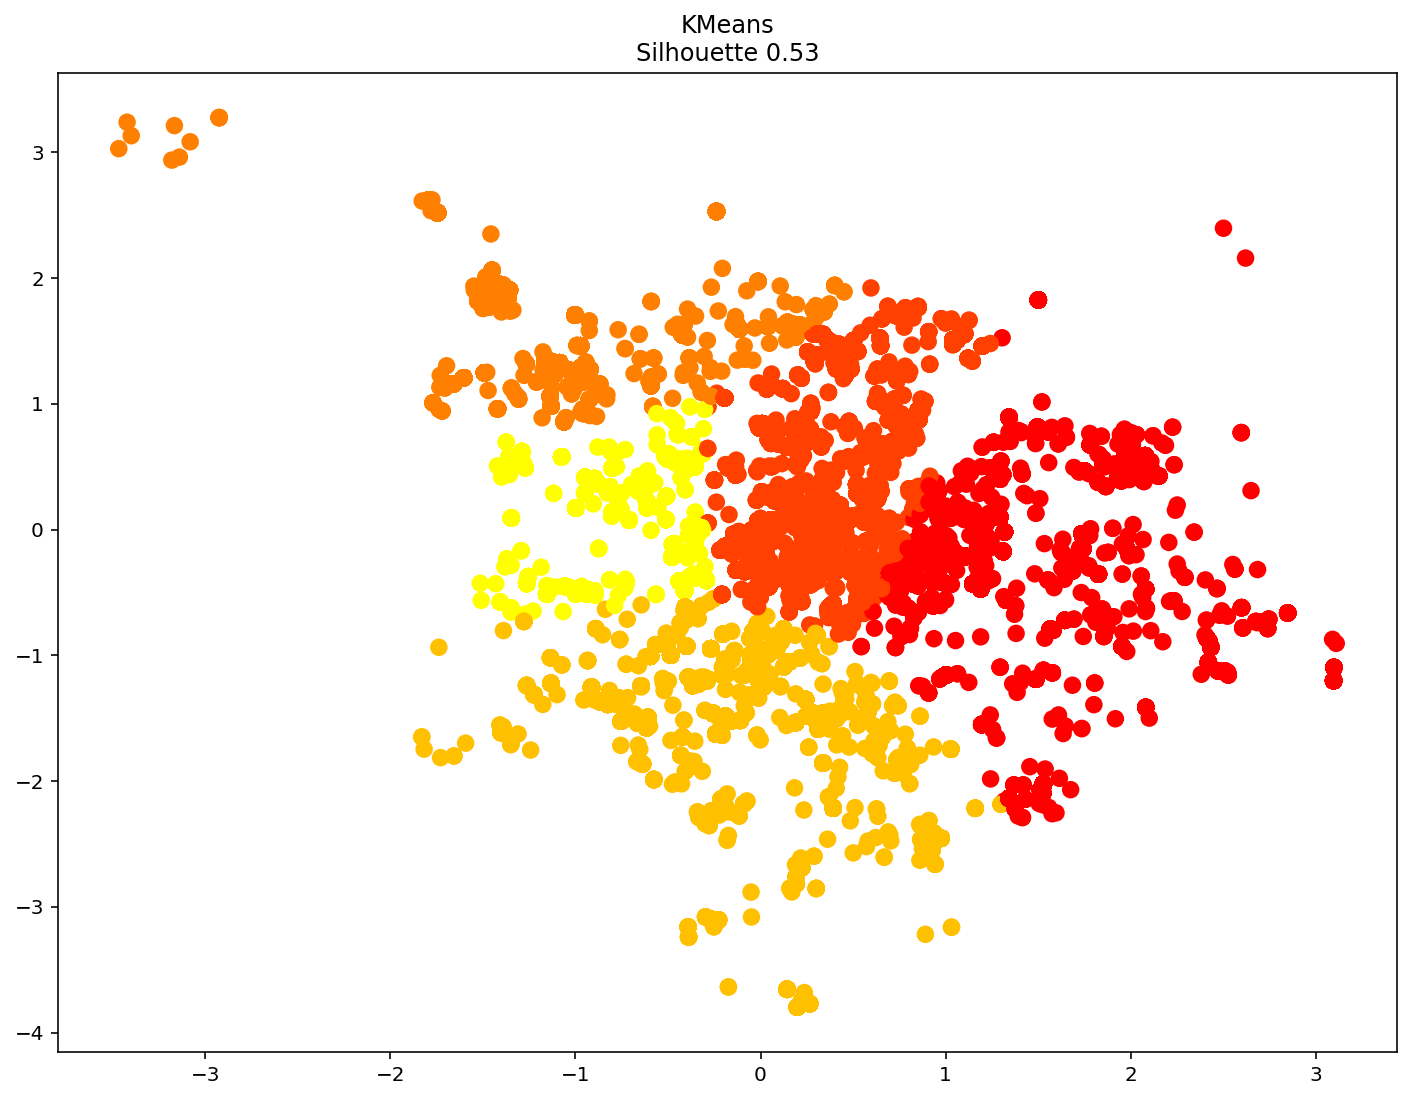

In [40]:
# кластеризуем и выводим картинку
fig, ax = plt.subplots()
clusters0 = clf_kmeans.fit_predict(X0_scaled)
ax.scatter(X0_scaled[:, 0], X0_scaled[:, 1], c=clusters0, cmap='autumn', s=60)
ax.set_title(get_descr(clf_kmeans.__class__.__name__, clusters0, X0_scaled))

### Подбор количества кластеров для KMeans

In [41]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

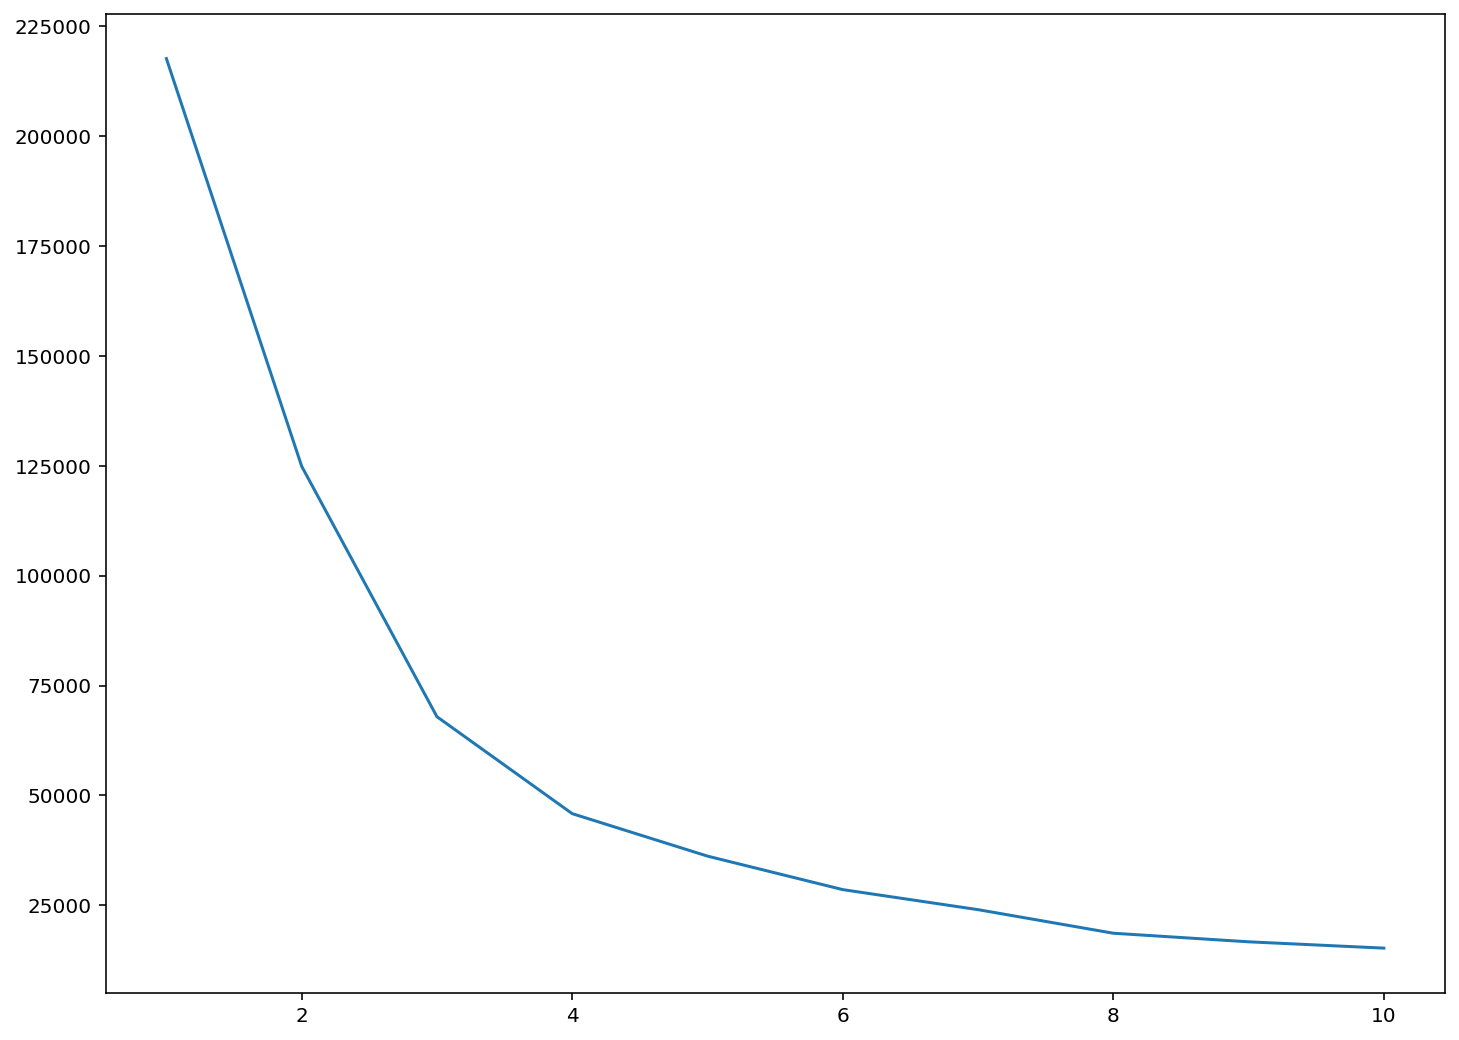

In [42]:
plt.plot(ks, k_inertia)

In [43]:
diff = np.diff(k_inertia)

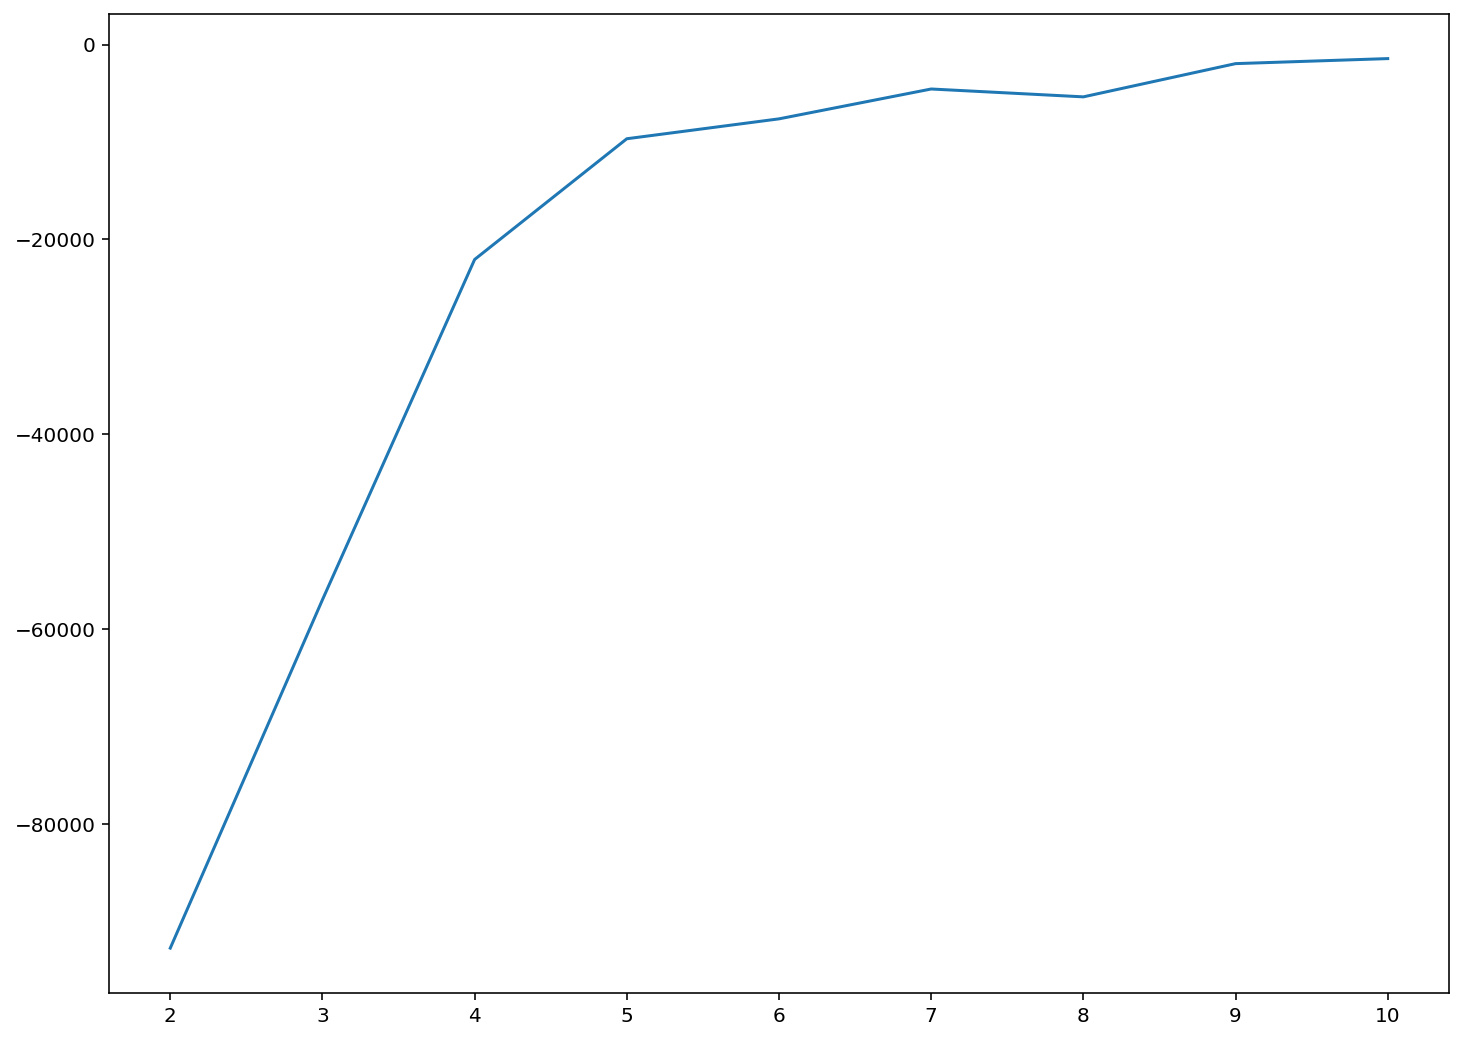

In [44]:
plt.plot(ks[1:], diff)

In [45]:
diff_r = diff[1:] / diff[:-1]

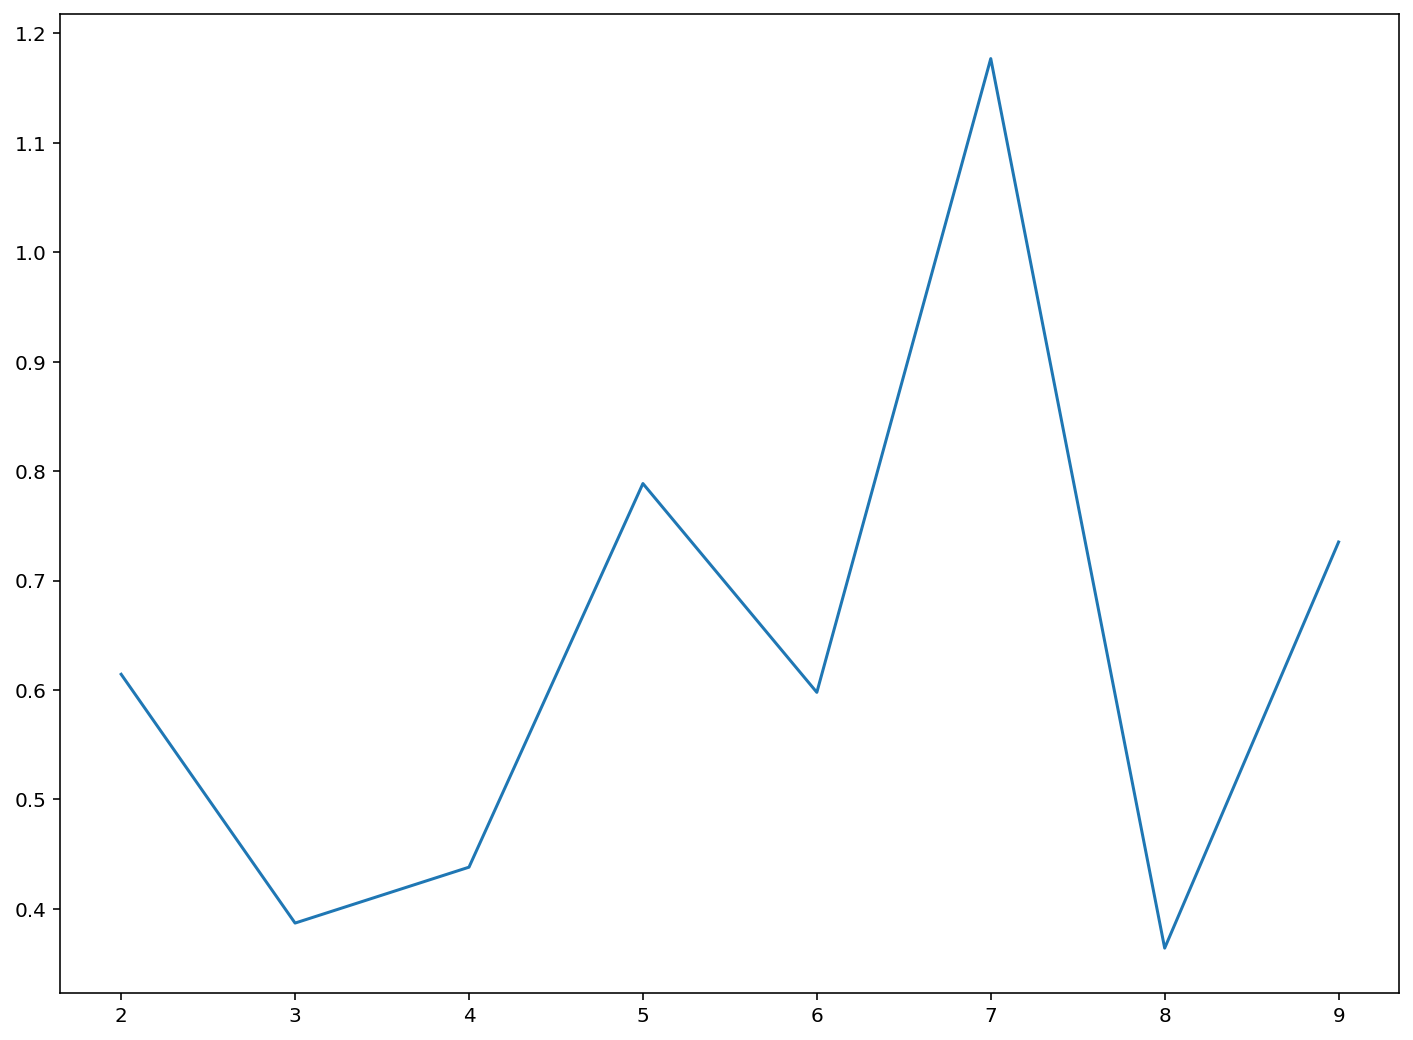

In [46]:
plt.plot(ks[1:-1], diff_r)

In [47]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

### Сделаем кластеризацию с учетом оптимального кол-ва кластеров

In [56]:
# Разделим на кластеры используя KMeans
clf_kmeans_new = KMeans(n_clusters=8)

Text(0.5, 1.0, 'KMeans\nSilhouette 0.57')

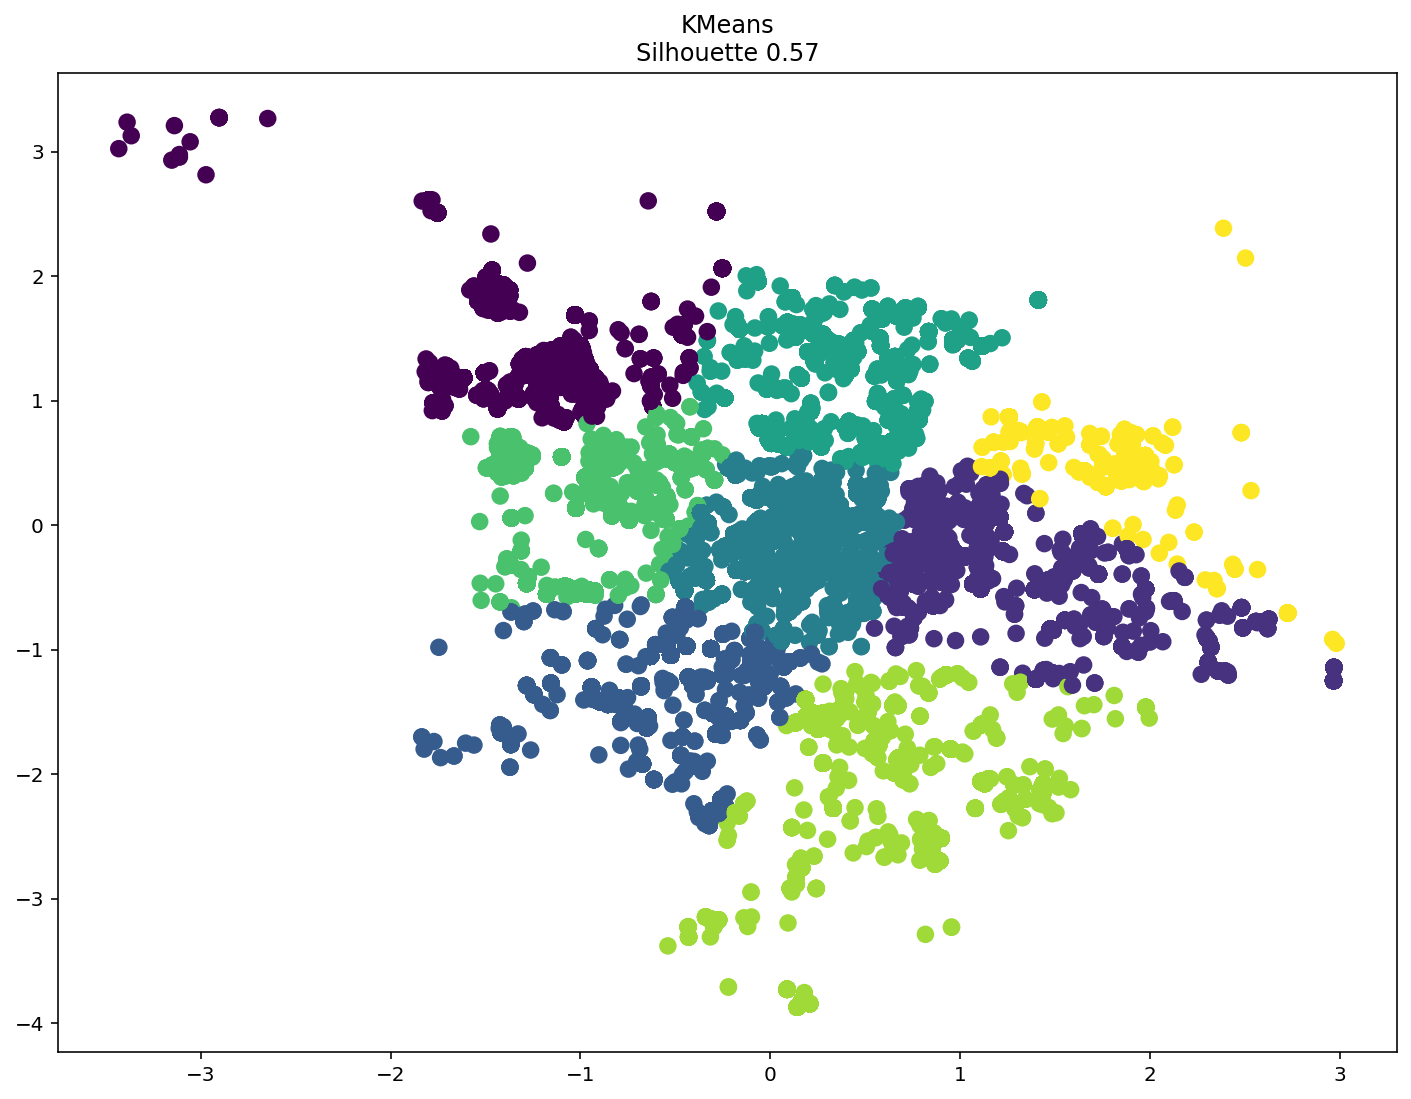

In [74]:
# кластеризуем и выводим картинку
fig, ax = plt.subplots()
clusters_new = clf_kmeans_new.fit_predict(X_scaled)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_new, cmap='viridis', s=60)
ax.set_title(get_descr(clf_kmeans_new.__class__.__name__, clusters_new, X_scaled))